## 面对对象编程
一切皆对象


类：定义抽象类型    
实例：根据类的定义被创建出来。  

思想：数据封装   

### type object class的关系

1，class 是type 生成的一个对象

In [1]:
a = 1 
type(a)

int

In [2]:
type(int) # type-> int -> 1

type

In [5]:
type(type)

type

In [7]:
'a',type('a'),type(type('a')) # type->str->a 

('a', str, type)

In [8]:
[],type([]),type(type([])) # type -> list -> []

([], list, type)

In [10]:
class Student:
    pass
Student(), type(Student()), type(type(Student())) # type -> Student -> instance

(<__main__.Student at 0x7faef075b6a0>, __main__.Student, type)

In [12]:
Student.__base__, Student.__bases__

(object, (object,))

object是最顶层的基类

In [13]:
type.__base__

object

In [14]:
type(object)

type

In [16]:
object.__base__ # 最顶层的object的基类是空

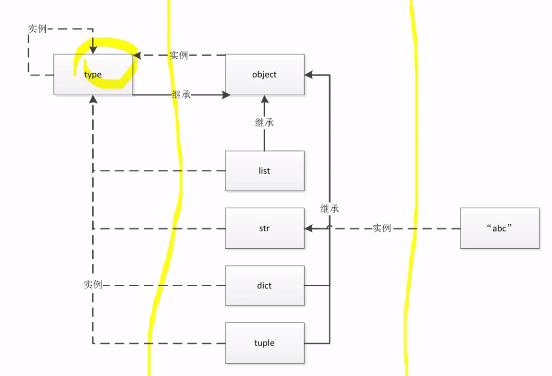

一切皆对象，都是type的实例，包括type本身。   
一切类的基类都是object.       

In [18]:
id(object) # 对象的地址

140390236448512

In [3]:
# 类名，大写字母开头。
# 括号，从哪个类继承而来
class Person(object):
    pass
xiaoming = Person()
xiaohong = Person()
id(xiaohong), id(xiaoming), xiaohong == xiaoming

(140300126915552, 140300126915440, False)

In [4]:
xiaohong

In [5]:
Person # 类并没有分配内存空间

__main__.Person

In [6]:
# 直接添加属性
xiaoming.name = 'Xiao Ming'
id(xiaoming) # 内存地址不变，表明是可变对象

140300126915440

In [7]:
xiaohong.name # A自行添加的属性与B无关

AttributeError: 'Person' object has no attribute 'name'

In [8]:
xiaoming.name

'Xiao Ming'

In [10]:
class Person(object):
    pass

p1 = Person()
p1.name = 'Bart'

p2 = Person()
p2.name = 'Adam'

p3 = Person()
p3.name = 'Lisa'

L1 = [p1, p2, p3]
L2 = sorted(L1, key=lambda p:p.name) # sorted by name.
L2,L2[0].name,L2[1].name,L2[2].name

([<__main__.Person at 0x7f9a2b3e8550>,
 'Adam',
 'Bart',
 'Lisa')

### 初始化实例属性
* __init__()方法被自动调用
* __init__() 方法的第一个参数必须是 self

In [12]:
class Person(object):
    def __init__(self, name, gender,birth,**kw):
        self.name = name
        self.gender = gender
        self.birth = birth
        for k,v in kw.items(): #python3 没有iteritems()
            setattr(self, k,v )

xiaoming = Person('Xiao Ming', 'Male', '1990-1-1', job='Student')
xiaoming.name, xiaoming.job

('Xiao Ming', 'Student')

### 访问限制
实现 private protected    
双下划线开头(__)无法被外部访问    

In [35]:
class Person(object):
    def __init__(self, name):
        self.name = name
        self._title = 'Mr'
        self.__job = 'Student'
        self.__age__= 13 
p = Person('Bob')
p.name,p._title

('Bob', 'Mr')

In [36]:
p.__job #双下划线开头(__)无法被外部访问

AttributeError: 'Person' object has no attribute '__job'

In [37]:
p._Person__job 
# 内部变形，仍然可以访问。
# 可以解决继承冲突的问题。
#从语言上，私有属性都不是绝对安全的，python的突破比较简单

'Student'

In [20]:
p.__age__ # 可以访问，但这种方式用于预定义的特殊属性

13

### 类属性，类变量
* 类本身也是一个对象。
* 类属性只有独一份。

In [29]:
class Person(object):
    count=0 #类变量
    def __init__(self,name):
        self.name = name # 实例变量
        Person.count = Person.count + 1

p1 = Person('Bob')
p1.count

1

In [23]:
p2 = Person('Alice')
p1.count,p2.count,Person.count

(2, 2, 2)

In [24]:
通过赋值改变属性值时，生成了同名的实例属性
实例属性的优先级更高
p2.count =4 
p1.count,p2.count,Person.count

(2, 4, 2)

In [25]:
del p2.count #删除实例属性
p1.count,p2.count,Person.count

(2, 2, 2)

In [28]:
class Person(object):
    __count = 0
    def __init__(self, name):
        Person.__count = Person.__count + 1
        self.name = name
        print (Person.__count)
p1 = Person('Bob')        
p2 = Person('Alice')        

1
2


In [31]:
p2.__count = 4 
p2.__count

4

In [32]:
p3 = Person('Cate')

3


In [33]:
Person.__count

AttributeError: type object 'Person' has no attribute '__count'

### 实例方法

In [34]:
class Person(object):

    def __init__(self, name, score): #构造方法
        self.name = name
        self.__score = score
        return
        
    def get_grade(self): # 实例方法
        if self.__score >=80:
            return 'A'
        if self.__score >=60:
            return "B"
        return "C"    

p1 = Person('Bob', 90)
p2 = Person('Alice', 65)
p3 = Person('Tim', 48)
p1.get_grade(),p2.get_grade(),p3.get_grade()

('A', 'B', 'C')

yield法是函数对象，是一个特殊的属性，也可以动态添加

In [37]:
import types
def fn_get_grade(self):
    if self.score >= 80:
        return 'A'
    if self.score >= 60:
        return 'B'
    return 'C'

class Person(object):
    def __init__(self, name, score):
        self.name = name
        self.score = score

p1 = Person('Bob', 90)
p1.get_grade = types.MethodType(fn_get_grade, p1)
p1.get_grade()

'A'

In [38]:
p2 = Person('Alice', 65)
p2.get_grade() # 实例方法只绑定在p1上

AttributeError: 'Person' object has no attribute 'get_grade'

In [40]:
Person.get_grade= types.MethodType(fn_get_grade, Person) # 不能给类动态添加方法属性
p2.get_grade()

AttributeError: type object 'Person' has no attribute 'score'

### 类的静态方法 
@staticmethod         
检查true or false时 比如好用

### 类方法

In [4]:
class Person(): # ()里用object. 
    __count = 0 # 类公用属性
    @classmethod # 将方法绑定到Person类上
    def how_many(cls): # class方法
        return cls.__count
    def __init__(self, name):
        self.name = name # 类定义的属性
        Person.__count = Person.__count + 1

Person.how_many()
p1 = Person('Bob')
Person.how_many(),p1.how_many()

0

(1, 1)

### 类与实例属性的查找顺序 -MRO算法

深度优先搜索
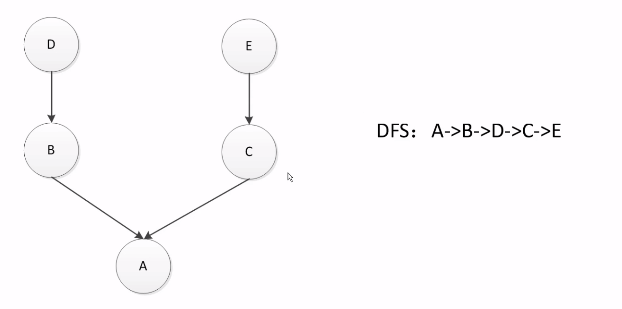
B在C之前


In [34]:
class D:
    pass 
class B(D):
    pass 
class E:
    pass
class C(E):
    pass
class A(B,C):
    pass 
A.__mro__ # 属性查找顺序 

(__main__.A, __main__.B, __main__.D, __main__.C, __main__.E, object)

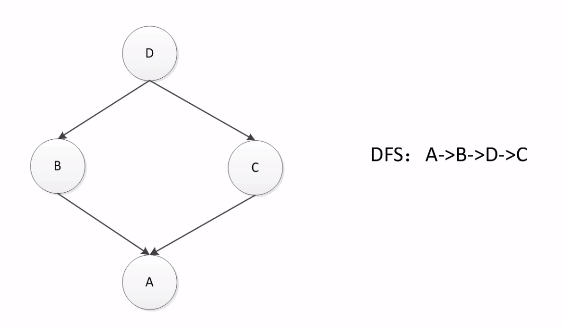
C 无法覆盖 D ，不合理

python3 使用c3算法

In [33]:
class D:
    pass 
class C(D):
    pass 
class B(D):
    pass 
class A(B,C):
    pass 
A.__mro__ # 属性查找顺序 

(__main__.A, __main__.B, __main__.C, __main__.D, object)

## 继承 
子类与父类是is 关系    
has关系，应该使用组合，而非继承， 即做为成员
* 类总是从某个类继承，object.
* 调用super().__init__



In [5]:
class Person(object):
    def __init__(self, name, gender):
        self.name = name
        self.gender = gender

In [6]:
class Student(Person):
    def __init__(self, name, gender, score):
        super(Student, self).__init__(name, gender)
        self.score = score

In [7]:
s1 = Student('lisi','male','98')
s1.score

'98'

In [10]:
class Teacher(Person):
    def __init__(self, name, gender, course):
        super(Teacher,self).__init__(name,gender) # super(Teacher,self)不能改动
        self.course = course
t = Teacher('Alice', 'Female', 'English')
t.course

'English'

### 判断类型
isinstance()

In [12]:
isinstance(s1,Person),isinstance(s1,Student),isinstance(t,Teacher),isinstance(t,object)

(True, True, True, True)

与 type()的区别 
isinstance 内部会检查继承链。     
type 不会检查继承链        


is 判断 id 是否相同       
== 判断 值 是否相等        


### 获取对象信息

In [18]:
type(123) #获取对象的类型
type(s1)

int

__main__.Student

In [19]:
dir(123) #获取对角的所有属性

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [21]:
dir(s1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'gender',
 'name',
 'score']

In [22]:
getattr(s1,'name') # 获取name属性

'lisi'

In [26]:
getattr(s1,'age') #获取没有的属性，报错

AttributeError: 'Student' object has no attribute 'age'

In [28]:
getattr(s1,'age',30) # 获取age属性，如果属性不存在，就返回默认值

30

In [29]:
setattr(s1,'name','zhangsan')
s1.name

'zhangsan'

In [32]:
setattr(s1,'clas','c1') #设置不存在的属性，会添加
s1.clas

'c1'

### 多重继承 
Python的网络服务器有TCPServer、UDPServer、UnixStreamServer、UnixDatagramServer，  
而服务器运行模式有 多进程ForkingMixin 和 多线程ThreadingMixin两种。
```
# 创建多进程模式的 TCPServer：
class MyTCPServer(TCPServer, ForkingMixin):
    pass
# 创建多线程模式的 UDPServer：
class MyUDPServer(UDPServer, ThreadingMixin):
    pass
```
没有多重继承，要实现上述所有可能的组合需要 4x2=8 个子类。

* Mixin类通常作为功能模块使用
* Mixin也可以看作是带实现的interface。这种设计模式实现了依赖反转原则
* JS Python, Ruby, Swift支持

也叫混合模式
* mixin类功能单一
* 不和基类关联，可以和任何基类组合，基类可以不和mixin关联初始化成功
* 不要使用super() 

In [17]:
class SkillMixin(object):
    pass
class BasketballMixin(SkillMixin):
    def skill(self):
        return 'basketball'
class FootballMixin(SkillMixin):
    def skill(self):
        return 'football'
class BStudent(Student,BasketballMixin):
    pass

class FTeacher(Teacher,FootballMixin):
    pass
s = BStudent('lisi','male','72')
t = FTeacher('wang','female','English')
s.skill(),t.skill()

('basketball', 'football')

## 多态
同一接口，不同实现

JAVA中需要父类提供接口，子类实现接口。      
python中 实现了同名方法，就可以实现多态。     

In [13]:
# json.load() 可以读取对象内容，只需要对象有read()方法
import json
class Students(object):
    def read(self):
        return r'["Tim", "Bob", "Alice"]'
s = Students()
json.load(s)

['Tim', 'Bob', 'Alice']

In [20]:
a = [1,2]
b = (2,3,4)
a.extend(b) # 传递可以迭代的数据，就可以
a 

[1, 2, 2, 3, 4]

## 抽象基类

类似java的接口，不能实例化的。    
动态语言，无法做类型检查
两个好处：     
1， 通过isinstance 判断 类型       
2， 强制接口规范          

尽量使有多继承         

In [23]:
class Company(object):
    def __init__(self, em_list):
        self.em = em_list
    def __len__(self):
        return len(self.em)
com = Company(['zhangsan','lisi'])

In [25]:
from collections.abc import Sized
isinstance(com, Sized) # com属于 sized的基类

True

需要强制某个子类必须实现某些方法              
设计一个抽象基类，指定子类必须实现某些方法            


In [26]:
class CacheBase():
    def get(self,key):
        raise NotImplementedError  # 强制子类必须实现
    def set(self,key,value):
        raise NotImplementedError
class RedisCache(CacheBase):
    pass
redis_cache = RedisCache() # 只能在调用函数时抛异常
redis_cache.set('key','value')

NotImplementedError: 

In [28]:
import abc 
class CacheBase(metaclass = abc.ABCMeta):
    @abc.abstractmethod
    def get(self,key):
        pass
    @abc.abstractmethod
    def set(self,key,value):
        pass
class RedisCache(CacheBase):
    pass
redis_cache = RedisCache() # 在初始化就必须实现
redis_cache.set('key','value')

TypeError: Can't instantiate abstract class RedisCache with abstract methods get, set

## 自省机制   
自省是通过一定的机制查课到对象的内部结构


In [44]:
class Person:
    '''
    This a Person Class
    '''
    name = 'user'
class Student(Person):
    def __init__(self, school_name):
        self.school_name = school_name
s1 = Student('imooc')
# 通过--dict--查询属性
s1.__dict__

{'school_name': 'imooc'}

In [45]:
s1.name # mro查找 name

'user'

In [46]:
Person.__dict__ # 查看类的属性

mappingproxy({'__module__': '__main__',
              '__doc__': '\n    This a Person Class\n    ',
              'name': 'user',
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>})

In [47]:
s1.__dict__['tel'] = '123456' # 可以直接添加属性
s1.tel

'123456'

In [48]:
a = [1, 2]
a.__dir__

<function list.__dir__()>

In [49]:
dir(a) # 查看所有属性名

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

## super()

In [59]:
class A :
    def __init__(self):
        print('A') 
class B(A):
    def __init__(self):
        print('B')
        super()  # 调用mro()列表中，下一个对象
        print(super())
        print(type(super()))
        super().__init__()
b=B()           

B
<super: <class 'B'>, <B object>>
<class 'super'>
A


为什么要调用supper()   
重用代码

## with
上下文管理器，协议     

In [61]:
try: 
    print('code started')
    raise KeyError
except KeyError as e:
    print('key error')

code started
key error


In [62]:
try: 
    print('code started')
    raise IndexError
except KeyError as e:
    print('key error')
else:  # 只有逻辑正确才会执行else
    print('other error')

code started


IndexError: 

In [64]:
try: 
    f = open('2.txt')
    print('code started')
    raise KeyError
except KeyError as e:
    print('key error')
finally:
    f.close()

code started
key error


finally 比 return 优先级高

In [66]:
def fn():
    try: 
        f = open('2.txt')
        print('code started')
        raise KeyError
        return 1
    except KeyError as e:
        print('key error')
        return 2
    finally:
        f.close()
        return 3 
fn()    

code started
key error


3

In [70]:
class Sample:
    def __enter__(self):
        # 获取资源
        print('enter')
        return self
    def __exit__(self,exc_type,exc_val, exc_tb):
        # 释放资源
        print('exit')
    def do_something(self):
        print('doing something')
with Sample() as sample:
    sample.do_something()

enter
doing something
exit


In [71]:
import contextlib
@contextlib.contextmanager
def file_open(file_name):
    print('file open')
    yield {} # 利用了生成器
    print("file close") 
with file_open('2.txt') as f_opened:
    print('file processing')

file open
file processing
file close
